# Libraries

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 64.9 MB/s eta 0:00:00


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install plotly

# Importing Libraries

In [ ]:
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
import shap

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Loading Dataset

In [ ]:
%cd /content
!mkdir data

/content


In [ ]:
!unzip /content/darwin.zip

Archive:  /content/darwin.zip
 extracting: DARWIN.zip              
 extracting: data.csv                


# Preprocessing

In [ ]:
df = pd.read_csv('/content/data/data.csv')

In [ ]:
d_df = df.drop('ID', axis=1)

In [ ]:
class_mapping = {'P': 1, 'H': 0}
d_df['class'] = d_df['class'].map(class_mapping)


count    174.000000
mean       0.511494
std        0.501310
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



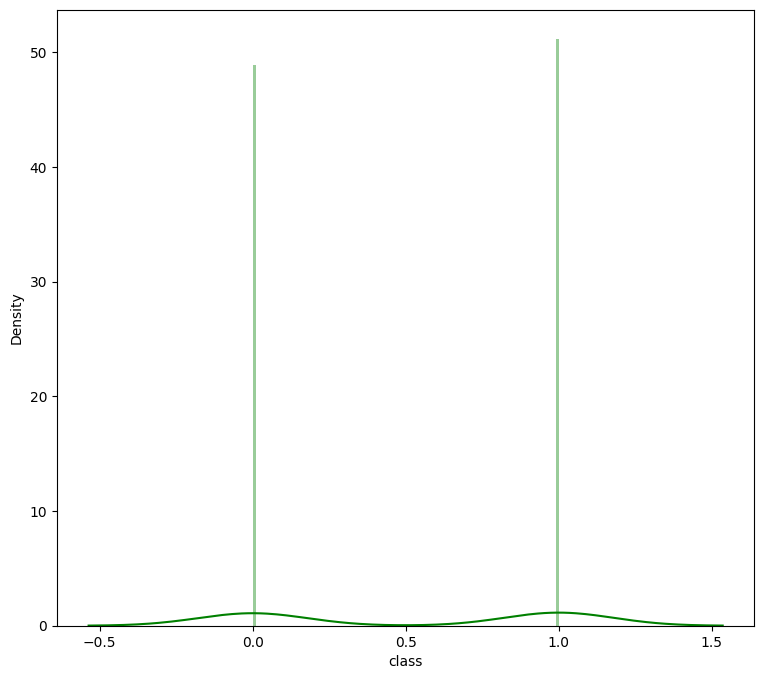

In [ ]:
print(d_df['class'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(d_df['class'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
X = d_df.drop(columns=['class'])
y = d_df['class']

Describing the Dataset


In [ ]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       ...
       'mean_gmrt25', 'mean_jerk_in_air25', 'mean_jerk_on_paper25',
       'mean_speed_in_air25', 'mean_speed_on_paper25', 'num_of_pendown25',
       'paper_time25', 'pressure_mean25', 'pressure_var25', 'total_time25'],
      dtype='object', length=450)

In [ ]:
# Assuming your DataFrame is named 'df'
column_list = df.columns.tolist()
print("All columns in the DataFrame:")
print(column_list)


All columns in the DataFrame:
['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1', 'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1', 'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1', 'mean_jerk_on_paper1', 'mean_speed_in_air1', 'mean_speed_on_paper1', 'num_of_pendown1', 'paper_time1', 'pressure_mean1', 'pressure_var1', 'total_time1', 'air_time2', 'disp_index2', 'gmrt_in_air2', 'gmrt_on_paper2', 'max_x_extension2', 'max_y_extension2', 'mean_acc_in_air2', 'mean_acc_on_paper2', 'mean_gmrt2', 'mean_jerk_in_air2', 'mean_jerk_on_paper2', 'mean_speed_in_air2', 'mean_speed_on_paper2', 'num_of_pendown2', 'paper_time2', 'pressure_mean2', 'pressure_var2', 'total_time2', 'air_time3', 'disp_index3', 'gmrt_in_air3', 'gmrt_on_paper3', 'max_x_extension3', 'max_y_extension3', 'mean_acc_in_air3', 'mean_acc_on_paper3', 'mean_gmrt3', 'mean_jerk_in_air3', 'mean_jerk_on_paper3', 'mean_speed_in_air3', 'mean_speed_on_paper3', 'num_of_pendown3', 'paper_time3', 'pressure_mean3',

# Experiment


# PCA

In [ ]:
x_df = d_df.astype('int64')

In [ ]:
Xx = x_df.drop(columns=['class'])
yy = x_df['class']

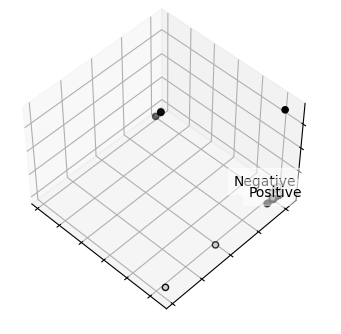

In [ ]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)



fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(Xx)
Xx = pca.transform(Xx)

for name, label in [('Negative', 0), ('Positive', 1)]:
    ax.text3D(
        Xx[yy == label, 0].mean(),
        Xx[yy == label, 1].mean(),
        X_transformed[yy == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(yy, [1, 2, 0]).astype(float)
ax.scatter(Xx[:, 0], Xx[:, 1], Xx[:, 2], c=yy, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

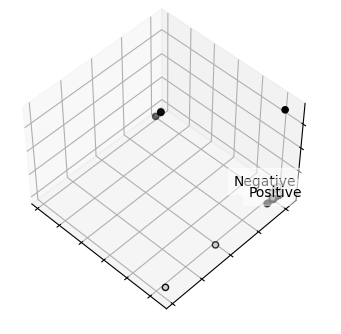

In [ ]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Negative", 0), ("Positive", 1)]:
    ax.text3D(
        X_transformed[yy == label, 0].mean(),
        X_transformed[yy == label, 1].mean() + 1.5,
        X_transformed[yy == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Reorder the labels to have colors matching the cluster results
y = np.choose(yy, [1, 2, 0]).astype(float)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

TypeError: Axes3D.scatter() missing 1 required positional argument: 'ys'

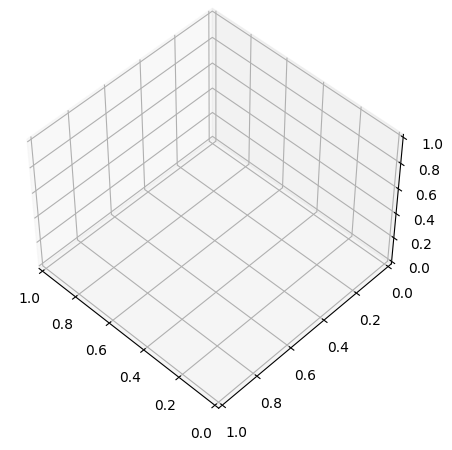

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have X (your feature matrix)
# Replace 'X' with your actual data

# Fit PCA
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)

# Create a scatter plot in 3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

# Scatter plot without labels
ax.scatter(X_transformed, c='b', marker='o', alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have X (your feature matrix) with shape (n_samples, 450)
# Replace 'X' with your actual data

# Select the first 100 features
X_first_100 = X[:, :100]

# Fit PCA
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X_first_100)

# Create a scatter plot in 3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

# Scatter plot without labels
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c='b', marker='o', alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


NameError: name 'X' is not defined

# IncrementPCA and Dimensionality Reduction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA

# Create a sample DataFrame (you can replace this with your own data)


# Normalize the data before applying IPCA
d_df_normalized = (X - X.mean()) / X.std()

# Initialize IPCA with the desired number of components
n_components = 5
ipca = IncrementalPCA(n_components=n_components)
ipca.fit(d_df_normalized)
df_transformed = ipca.transform(d_df_normalized)


In [ ]:
d_df_normalized

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,-0.039843,0.816843,-0.961506,-1.018109,-0.619403,-0.330348,-0.142923,0.581767,-1.094638,-0.210221,...,0.444911,-0.110150,1.900330,0.748525,0.366993,-0.539887,-0.156595,0.369258,2.340392,-0.039438
1,3.660239,1.857833,-0.991330,-1.048609,-0.172277,-0.148927,-0.376759,-0.540140,-1.128137,-0.370832,...,-2.260002,-1.585404,-0.655575,-1.869355,-2.252985,1.570315,4.378283,-0.385071,2.035030,0.270529
2,-0.242154,0.162507,-0.368226,-0.248523,0.215394,-0.695473,-0.076875,0.023483,-0.359745,-0.044605,...,-0.434328,0.480786,-1.155744,-0.314279,-0.561782,-0.430739,0.124151,-0.611282,-0.328083,-0.171406
3,-0.279297,0.162507,0.389994,-0.155078,-0.134663,0.381624,0.367972,-0.236824,0.205072,0.305606,...,-0.914257,-0.552694,-0.031064,-0.177098,-1.475234,1.352018,1.300820,-0.505157,1.180794,0.034243
4,-0.265072,-0.860637,-0.215662,-0.799327,-0.601202,-1.184439,-0.393615,-0.536671,-0.485680,-0.401569,...,-1.164737,-0.426069,0.393080,-0.768349,-1.396544,0.224151,-0.305086,0.654393,-0.083942,-0.184385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,-0.216075,0.192250,-0.304062,-0.218477,-0.084308,-0.404378,-0.426953,-0.079758,-0.302636,-0.466259,...,-0.326096,-0.468342,0.408459,0.024021,-0.748604,0.369683,0.075177,0.522417,1.484487,-0.168770
170,-0.278507,-0.125996,-0.124700,0.304502,0.045522,0.531512,-0.499785,-0.075788,0.041650,-0.474705,...,0.154997,0.421328,-0.960652,0.141820,-0.075897,-0.066911,-0.290682,0.296271,-0.042169,0.365500
171,-0.144950,-0.414498,-0.794428,-0.263369,-0.419197,0.012843,-0.657070,-0.290060,-0.661385,-0.599810,...,-0.681049,-0.543570,-1.147395,-0.651939,-0.423322,0.078620,0.448632,0.882290,-0.603998,-0.162511
172,-0.308538,-0.533469,-0.044299,-0.036668,-0.184411,-0.172690,0.268604,0.352276,-0.046126,0.309334,...,-0.681049,-0.543570,-1.147395,-0.651939,-0.423322,0.078620,0.448632,0.882290,-0.603998,-0.162511


In [ ]:
ipca = IncrementalPCA()
ipca.fit(d_df_normalized)
df_transformed = ipca.transform(d_df_normalized)

# Tensorflow decision forest


In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(d_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

121 examples in training, 53 examples in testing.


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='class', task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label='class', task = tfdf.keras.Task.REGRESSION)


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
train_dss = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='class', task = tfdf.keras.Task.CLASSIFICATION)
valid_dss = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label='class', task = tfdf.keras.Task.CLASSIFICATION)


Tensorflow Gradientboostedtreesmodel


In [ ]:
tfgmodel = tfdf.keras.GradientBoostedTreesModel()
tfgmodel.fit(train_dss)

Use /tmp/tmph5h4z_w4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:10.351952. Found 121 examples.
Training model...
Model trained in 0:00:03.507845
Compiling model...
Model compiled.


In [ ]:
# Compile the model with accuracy as a metric
tfgmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
test_loss, test_accuracy = tfgmodel.evaluate(valid_dss)
print(f"Test Accuracy: {test_accuracy:.4f}")


1/1 [==============================] - 3s 3s/step - loss: 0.3529 - accuracy: 0.8679
Test Accuracy: 0.8679


In [ ]:
evaluation_results = tfgmodel.evaluate(valid_ds)

# Print the evaluation results
print(f"Mean Absolute Error (MAE): {evaluation_results[0]}")
print(f"Mean Squared Error (MSE): {evaluation_results[1]}")

1/1 [==============================] - 1s 1s/step - loss: 0.3529 - accuracy: 0.8679
Mean Absolute Error (MAE): 0.35286766290664673
Mean Squared Error (MSE): 0.8679245114326477


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called "df"
column_names = d_df.columns.tolist()
print(column_names)


['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1', 'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1', 'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1', 'mean_jerk_on_paper1', 'mean_speed_in_air1', 'mean_speed_on_paper1', 'num_of_pendown1', 'paper_time1', 'pressure_mean1', 'pressure_var1', 'total_time1', 'air_time2', 'disp_index2', 'gmrt_in_air2', 'gmrt_on_paper2', 'max_x_extension2', 'max_y_extension2', 'mean_acc_in_air2', 'mean_acc_on_paper2', 'mean_gmrt2', 'mean_jerk_in_air2', 'mean_jerk_on_paper2', 'mean_speed_in_air2', 'mean_speed_on_paper2', 'num_of_pendown2', 'paper_time2', 'pressure_mean2', 'pressure_var2', 'total_time2', 'air_time3', 'disp_index3', 'gmrt_in_air3', 'gmrt_on_paper3', 'max_x_extension3', 'max_y_extension3', 'mean_acc_in_air3', 'mean_acc_on_paper3', 'mean_gmrt3', 'mean_jerk_in_air3', 'mean_jerk_on_paper3', 'mean_speed_in_air3', 'mean_speed_on_paper3', 'num_of_pendown3', 'paper_time3', 'pressure_mean3', 'pressure_var3', 'total_time3', 'ai

In [ ]:
tfdf.model_plotter.plot_model_in_colab(tfgmodel, tree_idx=0, max_depth=10)

# Random Forest Model

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=['accuracy']) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp4nqfdm6p as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.447809. Found 121 examples.
Training model...
Model trained in 0:00:00.771947
Compiling model...
Model compiled.


In [ ]:
rf.compile(metrics=["mse"])
evaluation = rf.evaluate(valid_ds, return_dict=True)

print(evaluation)
print()


1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - mse: 0.1040
{'loss': 0.0, 'mse': 0.1040492132306099}



In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [ ]:
# Compile the model with accuracy as a metric
rf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
test_loss, test_accuracy = rf.evaluate(valid_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")


1/1 [==============================] - 2s 2s/step - loss: 0.3566 - accuracy: 0.8868
Test Accuracy: 0.8868


In [ ]:
rf.make_inspector().features()

["air_time1" (1; #1),
 "air_time10" (1; #2),
 "air_time11" (1; #3),
 "air_time12" (1; #4),
 "air_time13" (1; #5),
 "air_time14" (1; #6),
 "air_time15" (1; #7),
 "air_time16" (1; #8),
 "air_time17" (1; #9),
 "air_time18" (1; #10),
 "air_time19" (1; #11),
 "air_time2" (1; #12),
 "air_time20" (1; #13),
 "air_time21" (1; #14),
 "air_time22" (1; #15),
 "air_time23" (1; #16),
 "air_time24" (1; #17),
 "air_time25" (1; #18),
 "air_time3" (1; #19),
 "air_time4" (1; #20),
 "air_time5" (1; #21),
 "air_time6" (1; #22),
 "air_time7" (1; #23),
 "air_time8" (1; #24),
 "air_time9" (1; #25),
 "disp_index1" (1; #26),
 "disp_index10" (1; #27),
 "disp_index11" (1; #28),
 "disp_index12" (1; #29),
 "disp_index13" (1; #30),
 "disp_index14" (1; #31),
 "disp_index15" (1; #32),
 "disp_index16" (1; #33),
 "disp_index17" (1; #34),
 "disp_index18" (1; #35),
 "disp_index19" (1; #36),
 "disp_index2" (1; #37),
 "disp_index20" (1; #38),
 "disp_index21" (1; #39),
 "disp_index22" (1; #40),
 "disp_index23" (1; #41),
 "di

In [ ]:
# The feature importances
rf.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("total_time23" (1; #441), 0.28365143440954566),
  ("total_time15" (1; #432), 0.28116516928858176),
  ("paper_time23" (1; #366), 0.2764515902548623),
  ("air_time17" (1; #9), 0.27172672630037964),
  ("air_time23" (1; #16), 0.2702324964585604),
  ("total_time17" (1; #434), 0.2695099731167368),
  ("num_of_pendown19" (1; #336), 0.2694581005128617),
  ("paper_time17" (1; #359), 0.26746869537190726),
  ("air_time15" (1; #7), 0.2664114379310687),
  ("paper_time20" (1; #363), 0.2657215041805446),
  ("total_time3" (1; #444), 0.26443875846702497),
  ("total_time6" (1; #447), 0.26417688109838894),
  ("total_time9" (1; #450), 0.2632619972253024),
  ("paper_time6" (1; #372), 0.2620707681204086),
  ("total_time2" (1; #437), 0.2609380862262315),
  ("pressure_mean4" (1; #395), 0.2603853634494037),
  ("air_time22" (1; #15), 0.2600696133425347),
  ("total_time7" (1; #448), 0.26003338470941817),
  ("total_time8" (1; #449), 0.25989169804159945),
  ("paper_time10" (1; #352), 0.2598

# Linear SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with features and target column
# Replace 'features' and 'target' with your actual column names

# Split the data into features (X) and target (y)
X = d_df.drop(columns=['class'])
y = d_df['class']

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LinearSVC
svc = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5, multi_class="crammer_singer"))

# Train the model
svc.fit(X_train, y_train)

# Make predictions on test data
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


# AdaBoostClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a dataframe 'df' with features and target column
# Replace 'features' and 'target' with your actual column names

# Split the data into features (X) and target (y)
X = d_df.drop(columns=['class'])
y = d_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

# Train the model
ada.fit(X_train, y_train)

# Make predictions on test data
y_pred = ada.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


Normalized

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a dataframe 'df' with features and target column
# Replace 'features' and 'target' with your actual column names

# Split the data into features (X) and target (y)
X = d_df.drop(columns=['class'])
y = d_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(d_df_normalized, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

# Train the model
ada.fit(X_train, y_train)

# Make predictions on test data
y_pred = ada.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


ABA with sample weights

F1-score: 0.9444
Precision: 0.8500
Recall: 0.8947


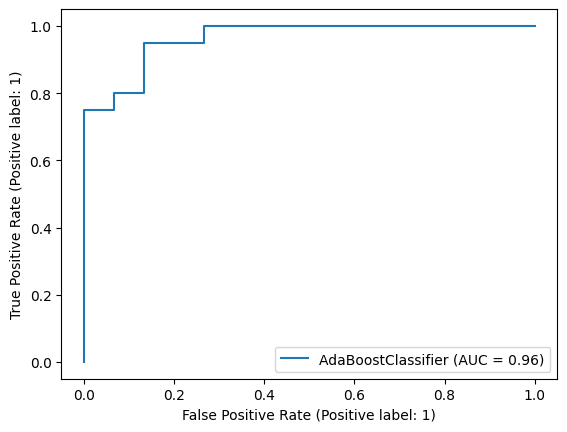

Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
aba_2 = AdaBoostClassifier(n_estimators=100, learning_rate=.1, random_state=2)

# Train the model

# Create sample weights
sample_weights = np.zeros(len(yy_train))
sample_weights[yy_train == 0] = 5 # Weight for class 0
sample_weights[yy_train == 1] = 0.1  # Weight for class 1

# Train the model with sample weights
aba_2.fit(Xx_train, yy_train, sample_weight=sample_weights)
y_prob = aba_2.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(aba_2, Xx_test, yy_test)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

F1-score: 0.9444
Precision: 0.8500
Recall: 0.8947


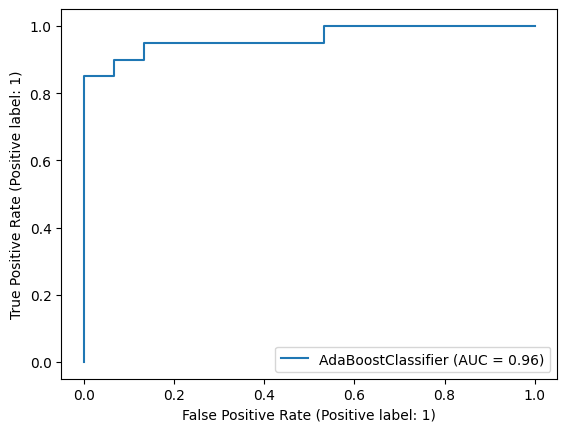

Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
aba_3 = AdaBoostClassifier(n_estimators=100, learning_rate=.1, random_state=2)

# Train the model

# Create sample weights
# Weight for class 1

# Train the model with sample weights
aba_3.fit(Xx_train, yy_train)
y_prob = aba_3.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(aba_3, Xx_test, yy_test)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# GradientBoostingClassifier

Accuracy: 0.91
F1-score: 1.0000
Precision: 0.8500
Recall: 0.9189


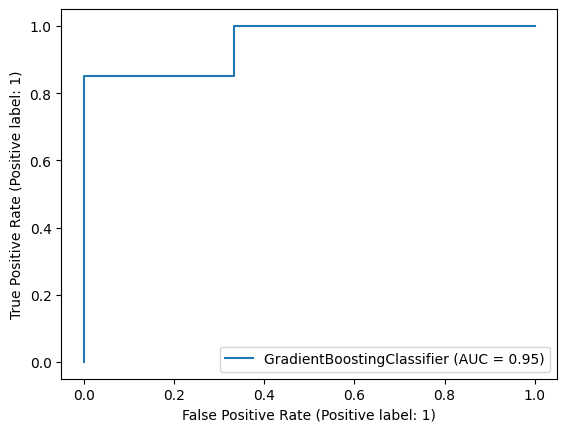

Matthews Correlation Coefficient (MCC): 0.8416


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a dataframe 'df' with features and target column
# Replace 'features' and 'target' with your actual column names

# Split the data into features (X) and target (y)
X = d_df.drop(columns=['class'])
y = d_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions on test data
y_pred =gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(gbc, X_test, y_test)
plt.show()
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


## Cross Val Score

## Plain GBC with Threshold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
t_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

# Train the model
t_gbc.fit(X_train, y_train)

# Make predictions on test data
y_pred = t_gbc.predict(X_test)
y_prob = t_gbc.predict_proba(X_test)[:, 1]  # Probability of positive class

# Try different thresholds
best_threshold = None
best_f1 = 0.0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_prob >= threshold).astype(int)
    f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"Threshold: {threshold:.2f} | F1-score: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | MCC: {mcc:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f} (F1-score: {best_f1:.4f})")

# Evaluate the model with the best threshold
y_pred_best = (y_prob >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best threshold: {accuracy:.2f}")


Threshold: 0.10 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.20 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.30 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.40 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.50 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.60 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.70 | F1-score: 1.0000 | Precision: 0.8500 | Recall: 0.9189 | MCC: 0.8416
Threshold: 0.80 | F1-score: 1.0000 | Precision: 0.8000 | Recall: 0.8889 | MCC: 0.7947
Threshold: 0.90 | F1-score: 1.0000 | Precision: 0.8000 | Recall: 0.8889 | MCC: 0.7947
Best Threshold: 0.10 (F1-score: 1.0000)
Accuracy with best threshold: 0.91


## Grid Search for F1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
b_gbc = GradientBoostingClassifier(random_state=0)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(b_gbc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model.predict_proba(X_test)[:, 1]

# Try different thresholds
best_threshold = None
best_f1 = 0.0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_prob >= threshold).astype(int)
    f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"Threshold: {threshold:.2f} | F1-score: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | MCC: {mcc:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f} (F1-score: {best_f1:.4f})")

# Evaluate the model with the best threshold
y_pred_best = (y_prob >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best threshold: {accuracy:.2f}")


Threshold: 0.10 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.20 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.30 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.40 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.50 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.60 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.70 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.80 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.90 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Best Threshold: 0.10 (F1-score: 0.9444)
Accuracy with best threshold: 0.89


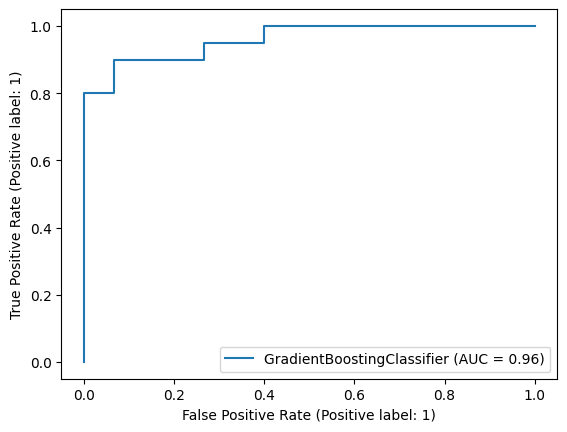

F1-score: 0.9444
Precision: 0.8500
Recall: 0.8947
Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


In [ ]:
y_pred = best_model.predict(X_test)
svc_disp = RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

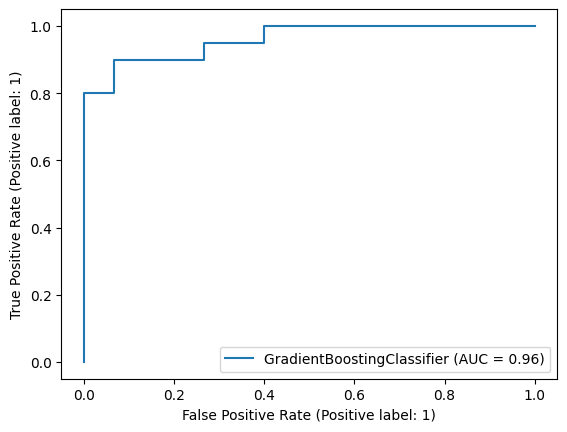

F1-score: 0.9444
Precision: 0.8500
Recall: 0.8947
Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model.predict_proba(X_test)[:, 1]

y_pred = best_model.predict(X_test)
svc_disp = RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

## Grid Search but for AUC score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
a_gbc = GradientBoostingClassifier(random_state=0)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(a_gbc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model_a = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model_a.predict_proba(X_test)[:, 1]

# Try different thresholds
best_threshold = None
best_f1 = 0.0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_prob >= threshold).astype(int)
    f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"Threshold: {threshold:.2f} | F1-score: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | MCC: {mcc:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f} (F1-score: {best_f1:.4f})")

# Evaluate the model with the best threshold
y_pred_best = (y_prob >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best threshold: {accuracy:.2f}")


Threshold: 0.10 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.20 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.30 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.40 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.50 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.60 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.70 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.80 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.90 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Best Threshold: 0.10 (F1-score: 0.9474)
Accuracy with best threshold: 0.91


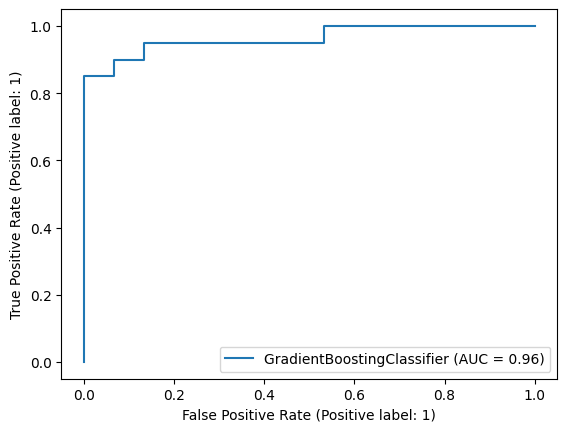

F1-score: 0.9474
Precision: 0.9000
Recall: 0.9231
Accuracy: 0.91
Matthews Correlation Coefficient (MCC): 0.8278


In [ ]:
y_prob = best_model_a.predict_proba(X_test)[:, 1]

y_pred = best_model_a.predict(X_test)
svc_disp = RocCurveDisplay.from_estimator(best_model_a, X_test, y_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model_a = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model_a.predict_proba(X_test)[:, 1]

# Try different thresholds
best_threshold = None
best_f1 = 0.0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_prob >= threshold).astype(int)
    f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"Threshold: {threshold:.2f} | F1-score: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | MCC: {mcc:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f} (F1-score: {best_f1:.4f})")

# Evaluate the model with the best threshold
y_pred_best = (y_prob >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best threshold: {accuracy:.2f}")


Threshold: 0.10 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.20 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.30 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.40 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.50 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.60 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.70 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.80 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Threshold: 0.90 | F1-score: 0.9444 | Precision: 0.8500 | Recall: 0.8947 | MCC: 0.7756
Best Threshold: 0.10 (F1-score: 0.9474)
Accuracy with best threshold: 0.91


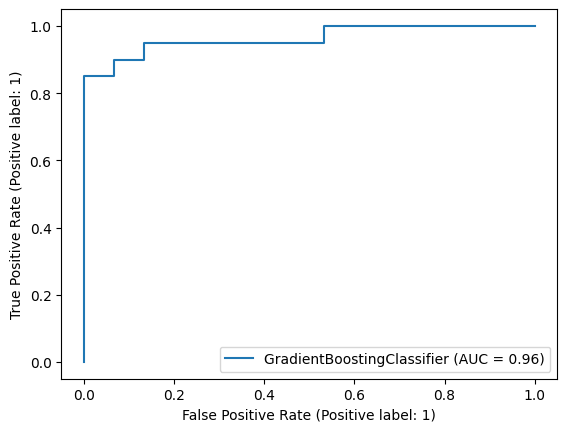

F1-score: 0.9474
Precision: 0.9000
Recall: 0.9231
Accuracy: 0.91
Matthews Correlation Coefficient (MCC): 0.8278
Balanced Accuracy: 0.9167


In [ ]:
y_prob = best_model_a.predict_proba(X_test)[:, 1]

y_pred = best_model_a.predict(X_test)
svc_disp = RocCurveDisplay.from_estimator(best_model_a, X_test, y_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

## Grid Search but for Accuracy

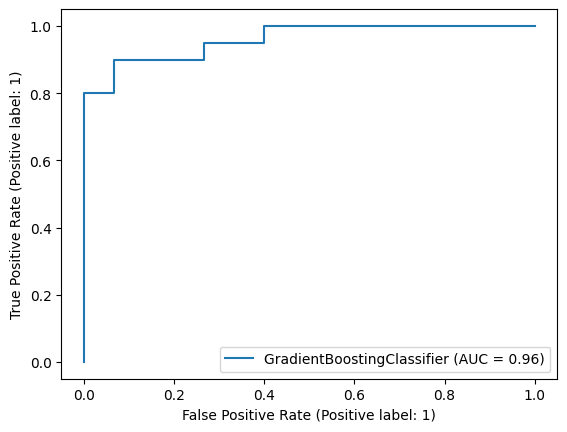

F1-score: 0.9444
Precision: 0.8500
Recall: 0.8947
Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7756


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
acc_gbc = GradientBoostingClassifier(random_state=0)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(acc_gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model_acc = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model_acc.predict_proba(X_test)[:, 1]

y_pred = best_model_acc.predict(X_test)
svc_disp = RocCurveDisplay.from_estimator(best_model_acc, X_test, y_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(gbc, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))

Cross-Validation Scores: [0.85714286 0.85714286 0.85714286 0.85714286 0.92857143 0.92857143
 0.78571429 0.85714286 0.92857143 0.92307692]
Mean Accuracy: 0.8780219780219781
STD: 0.04516202766600996


# With PCA

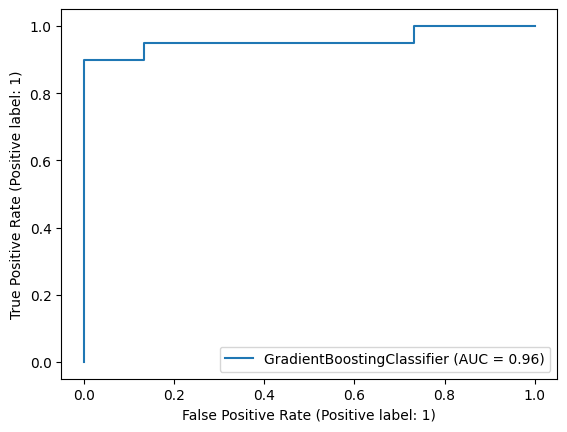

F1-score: 0.9474
Precision: 0.9000
Recall: 0.9231
Accuracy: 0.91
Matthews Correlation Coefficient (MCC): 0.8278


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import matthews_corrcoef
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
pca_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, random_state=0)

# Train the model
pca_gbc.fit(Xx_train, yy_train)

# Make predictions on test data
y_pred = pca_gbc.predict(Xx_test)
svc_disp = RocCurveDisplay.from_estimator(pca_gbc, Xx_test, yy_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(pca_gbc, Xx_train, yy_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.78571429 0.64285714 0.78571429 0.78571429 0.78571429 0.85714286
 0.57142857 0.78571429 0.64285714 0.76923077]
Mean Accuracy: 0.7412087912087912
STD: 0.0850300244606303


# Different Thresholds to raise Mean Accuracy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
t_pca_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, random_state=0)
t_pca_gbc.fit(Xx_train, yy_train)

# Make predictions on test data
y_prob = t_pca_gbc.predict_proba(Xx_test)[:, 1]  # Probability of positive class

# Try different thresholds
best_threshold = None
best_f1 = 0.0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_prob >= threshold).astype(int)
    f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
    mcc = matthews_corrcoef(yy_test, y_pred)
    print(f"Threshold: {threshold:.2f} | F1-score: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | MCC: {mcc:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f} (F1-score: {best_f1:.4f})")

# Evaluate the model with the best threshold
y_pred_best = (y_prob >= best_threshold).astype(int)
accuracy = accuracy_score(yy_test, y_pred_best)
print(f"Accuracy with best threshold: {accuracy:.2f}")


Threshold: 0.10 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.20 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.30 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.40 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.50 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.60 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.70 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.80 | F1-score: 0.9474 | Precision: 0.9000 | Recall: 0.9231 | MCC: 0.8278
Threshold: 0.90 | F1-score: 1.0000 | Precision: 0.9000 | Recall: 0.9474 | MCC: 0.8911
Best Threshold: 0.90 (F1-score: 1.0000)
Accuracy with best threshold: 0.94


# With Sample Weights

F1-score: 0.9474
Precision: 0.9000
Recall: 0.9231


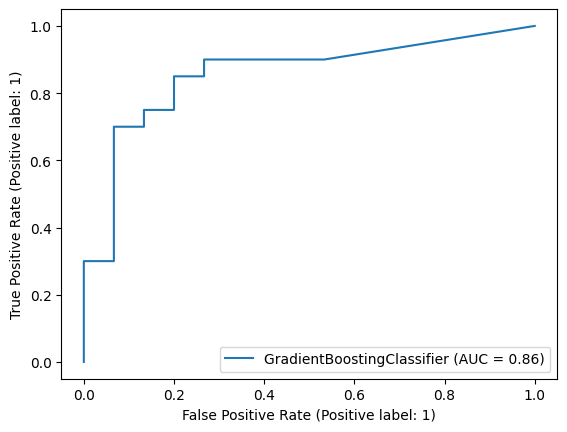

Accuracy: 0.91


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
sample_pca_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=2)

# Train the model

# Create sample weights
sample_weights = np.zeros(len(yy_train))
sample_weights[yy_train == 0] = 5 # Weight for class 0
sample_weights[yy_train == 1] = 0.1  # Weight for class 1

# Train the model with sample weights
sample_pca_gbc.fit(Xx_train, yy_train, sample_weight=sample_weights)
y_prob = sample_pca_gbc.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(sample_pca_gbc, Xx_test, yy_test)
plt.show()
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Final Model - GradientBoostingClassifier

# Experiment

# SMOTE

F1-score: 0.9500
Precision: 0.9500
Recall: 0.9500


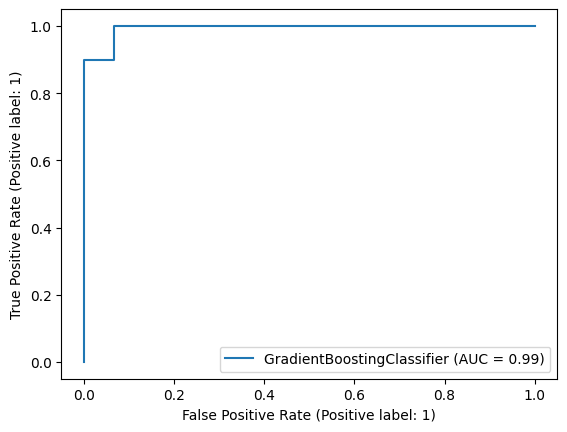

Matthews Correlation Coefficient (MCC): 0.7667
Accuracy: 0.89
Balanced Accuracy: 0.8833


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.metrics import balanced_accuracy_score
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=0)
Xx_train_resampled, yy_train_resampled = smote.fit_resample(Xx_train, yy_train)

# Create a Gradient Boosting Classifier
smote_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=0)

# Train the model on the resampled data
smote_clf.fit(Xx_train_resampled, yy_train_resampled)

# Calculate predicted probabilities
y_prob = smote_clf.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, smote_clf.predict(Xx_test), average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(smote_clf, Xx_test, yy_test)
plt.show()
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

## Cross Val for Smote

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(smote_clf, Xx_train, yy_train, cv=10, scoring='roc_auc')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.81632653 0.79591837 0.81632653 0.91836735 0.89795918 0.97959184
 0.65306122 0.93877551 0.7755102  1.        ]
Mean Accuracy: 0.8591836734693878
STD: 0.10140618978616198


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(smote_clf, Xx_train, yy_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

KeyboardInterrupt: 

## Only Normalized

F1-score: 0.9444
Precision: 0.8500
Recall: 0.8947


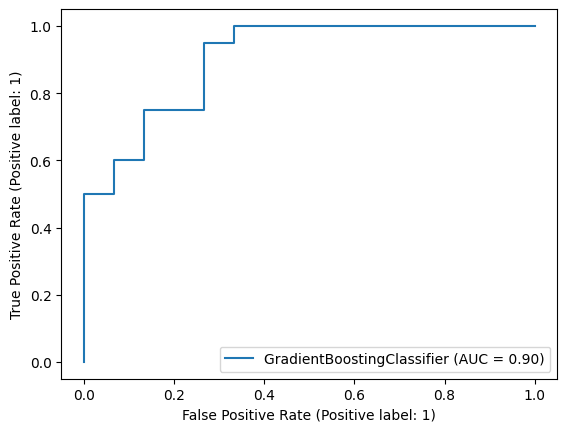

Matthews Correlation Coefficient (MCC): 0.7756


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(d_df_normalized, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=2)

# Train the model

# Create sample weights
sample_weights = np.zeros(len(yy_train))
sample_weights[yy_train == 0] = 5 # Weight for class 0
sample_weights[yy_train == 1] = 0.1  # Weight for class 1

# Train the model with sample weights
clf.fit(Xx_train, yy_train, sample_weight=sample_weights)
y_prob = clf.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(clf, Xx_test, yy_test)
plt.show()
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

## Grid Search for AUC with Smote

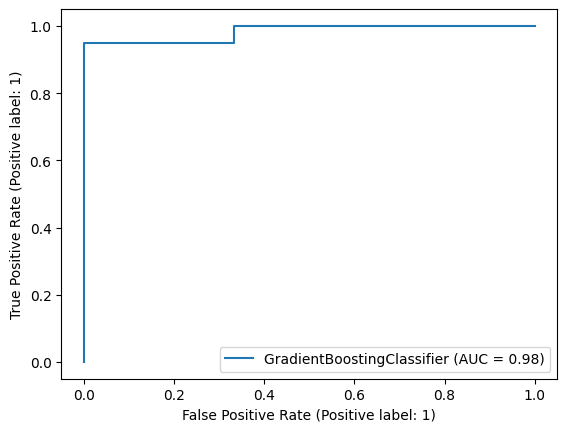

F1-score: 0.9500
Precision: 0.9500
Recall: 0.9500
Accuracy: 0.94
Matthews Correlation Coefficient (MCC): 0.8833
Balanced Accuracy: 0.9417


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(smote_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(Xx_train, yy_train)

# Get the best model from grid search
best_model_auc = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model_auc.predict_proba(Xx_test)[:, 1]

y_pred = best_model_auc.predict(Xx_test)
svc_disp = RocCurveDisplay.from_estimator(best_model_auc, Xx_test, yy_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

### Cross Val score for grid search for auc with smote

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(best_model_auc, Xx_train, yy_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.78571429 0.78571429 0.71428571 0.85714286 0.71428571 0.78571429
 0.5        0.71428571 0.78571429 0.84615385]
Mean Accuracy: 0.7489010989010989
STD: 0.09599044200295775


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(best_model_auc, Xx_train, yy_train, cv=10, scoring='roc_auc')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.83673469 0.93877551 0.83673469 0.89795918 0.91836735 0.93877551
 0.67346939 0.89795918 0.91836735 0.97619048]
Mean AUC: 0.8833333333333332
STD: 0.08126404875392686


## Grid Search for Accuracy with Smote

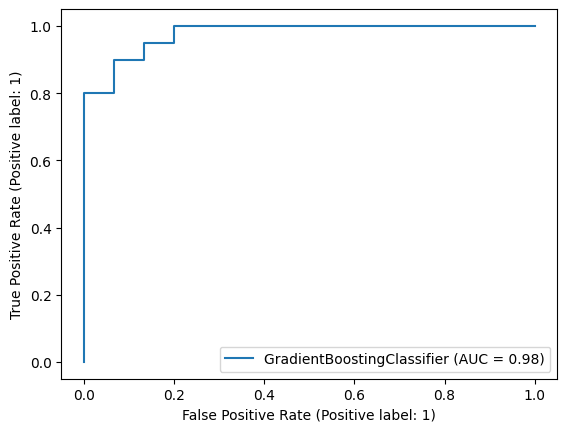

F1-score: 0.9000
Precision: 0.9000
Recall: 0.9000
Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7667


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(smote_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xx_train, yy_train)

# Get the best model from grid search
best_model_sma = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model_sma.predict_proba(Xx_test)[:, 1]

y_pred = best_model_sma.predict(Xx_test)
svc_disp = RocCurveDisplay.from_estimator(best_model_sma, Xx_test, yy_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



### Cross Val for best model smote for accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(best_model_sma, Xx_train, yy_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.64285714 0.78571429 0.78571429 0.57142857 0.5        0.71428571
 0.42857143 0.71428571 0.85714286 0.92307692]
Mean Accuracy: 0.6923076923076923
STD: 0.14914318749295427


## Grid Search for MCC score with Smote

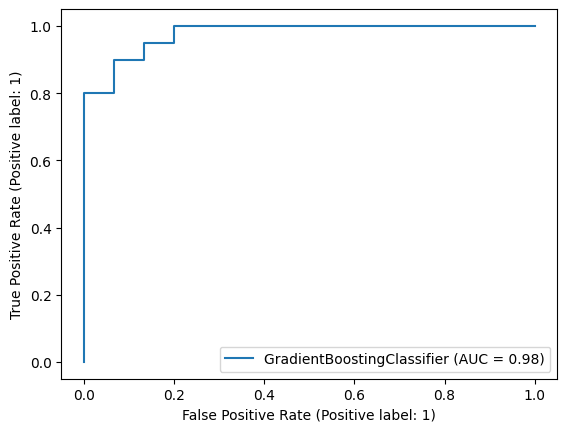

F1-score: 0.9000
Precision: 0.9000
Recall: 0.9000
Accuracy: 0.89
Matthews Correlation Coefficient (MCC): 0.7667


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(smote_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xx_train, yy_train)

# Get the best model from grid search
best_model_mc = grid_search.best_estimator_

# Make predictions on test data
y_prob = best_model_mc.predict_proba(Xx_test)[:, 1]

y_pred = best_model_sma.predict(Xx_test)
svc_disp = RocCurveDisplay.from_estimator(best_model_mc, Xx_test, yy_test)
plt.show()
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Evaluate the model
accuracy = accuracy_score(yy_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(yy_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



### Cross Val for MCC score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(best_model_mc, Xx_train, yy_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.64285714 0.78571429 0.78571429 0.57142857 0.5        0.71428571
 0.42857143 0.71428571 0.85714286 0.92307692]
Mean Accuracy: 0.6923076923076923
STD: 0.14914318749295427


# Sample Weights

F1-score: 0.9474
Precision: 0.9000
Recall: 0.9231


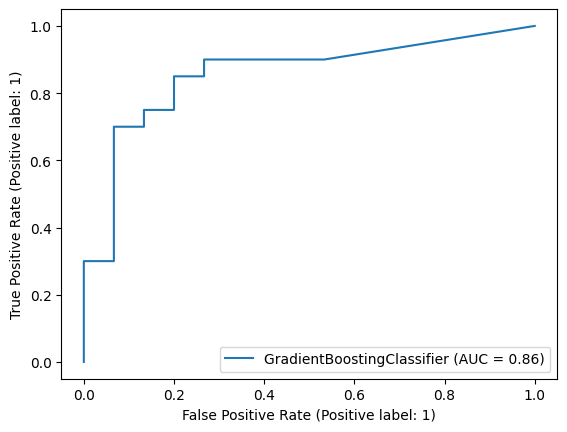

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=2)

# Train the model

# Create sample weights
sample_weights = np.zeros(len(yy_train))
sample_weights[yy_train == 0] = 5 # Weight for class 0
sample_weights[yy_train == 1] = 0.1  # Weight for class 1

# Train the model with sample weights
clf.fit(Xx_train, yy_train, sample_weight=sample_weights)
y_prob = clf.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(clf, Xx_test, yy_test)
plt.show()


F1-score: 0.9474
Precision: 0.9000
Recall: 0.9231


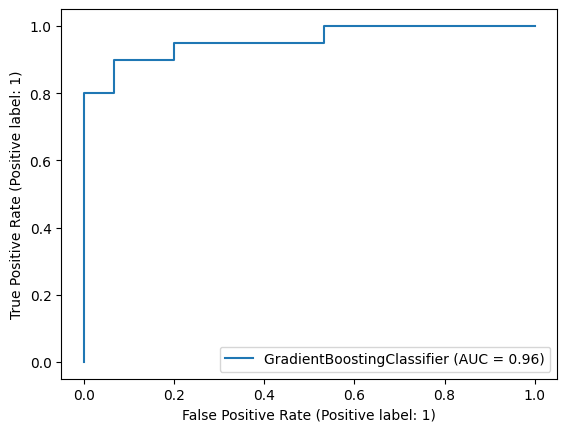

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Assuming you have X_transformed and y
# Replace 'X_transformed' and 'y' with your actual data
y = d_df['class']
# Split the data into training and testing sets
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=2)

# Train the model

# Create sample weights


# Train the model with sample weights
clf.fit(Xx_train, yy_train)
y_prob = clf.predict_proba(Xx_test)[:, 1]

# Compute F1-score, precision, and recall
f1, precision, recall, _ = precision_recall_fscore_support(yy_test, y_pred, average='binary')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the ROC curve
svc_disp = RocCurveDisplay.from_estimator(clf, Xx_test, yy_test)
plt.show()


# Cross-validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(sample_pca_gbc, Xx_train, yy_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("STD:", np.std(cv_scores))


Cross-Validation Scores: [0.78571429 0.85714286 0.78571429 0.92857143 0.92857143 0.85714286
 0.78571429 0.85714286 0.85714286 0.84615385]
Mean Accuracy: 0.8489010989010989
STD: 0.049951673300294326


# Features, Insights

# Feature Importance

In [ ]:
# Assuming clf is already trained
feature_importance = clf.feature_importances_
print("Feature Importance Scores:")
for feature, importance in zip(d_df.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


Feature Importance Scores:
air_time1: 0.0000
disp_index1: 0.0000
gmrt_in_air1: 0.0000
gmrt_on_paper1: 0.0000
max_x_extension1: 0.0000
max_y_extension1: 0.0000
mean_acc_in_air1: 0.0000
mean_acc_on_paper1: 0.0000
mean_gmrt1: 0.0000
mean_jerk_in_air1: 0.0000
mean_jerk_on_paper1: 0.0000
mean_speed_in_air1: 0.0001
mean_speed_on_paper1: 0.0000
num_of_pendown1: 0.0000
paper_time1: 0.0000
pressure_mean1: 0.0000
pressure_var1: 0.0002
total_time1: 0.0001
air_time2: 0.0000
disp_index2: 0.0003
gmrt_in_air2: 0.0000
gmrt_on_paper2: 0.0000
max_x_extension2: 0.0026
max_y_extension2: 0.0000
mean_acc_in_air2: 0.0004
mean_acc_on_paper2: 0.0000
mean_gmrt2: 0.0000
mean_jerk_in_air2: 0.0181
mean_jerk_on_paper2: 0.0000
mean_speed_in_air2: 0.0000
mean_speed_on_paper2: 0.0000
num_of_pendown2: 0.0000
paper_time2: 0.0000
pressure_mean2: 0.0000
pressure_var2: 0.0000
total_time2: 0.0000
air_time3: 0.0000
disp_index3: 0.0000
gmrt_in_air3: 0.0000
gmrt_on_paper3: 0.0010
max_x_extension3: 0.0000
max_y_extension3: 0.00

Shap explainer

In [ ]:
# Fits the explainer
explainer = shap.Explainer(gbc.predict, X_test, max_evals=901)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 36it [00:14,  1.07s/it]


# Shap graphs

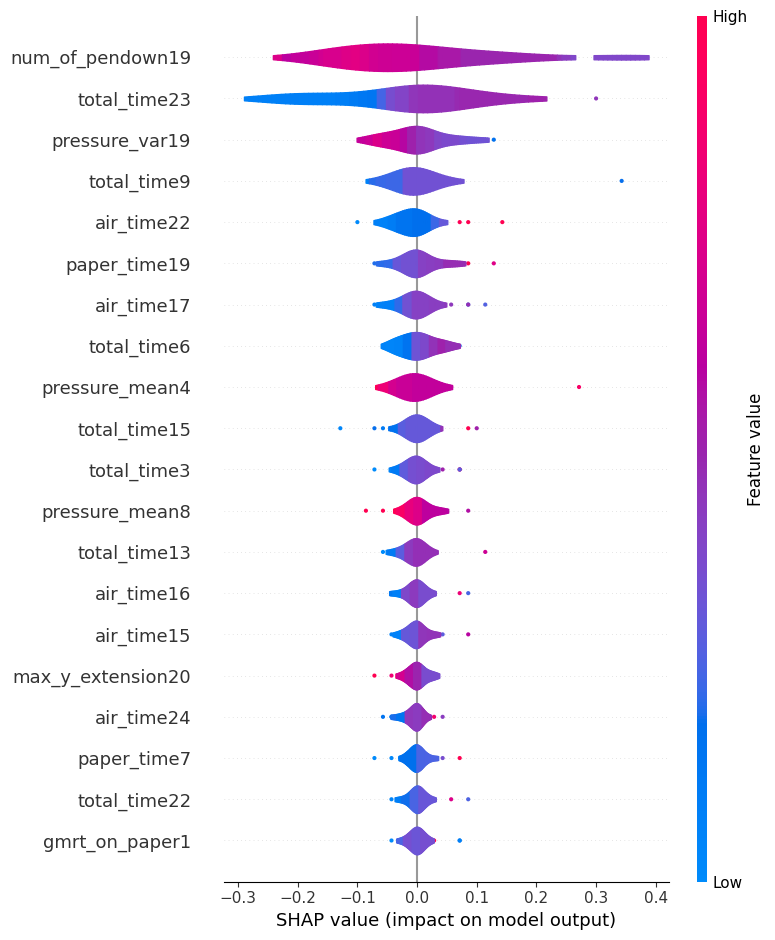

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

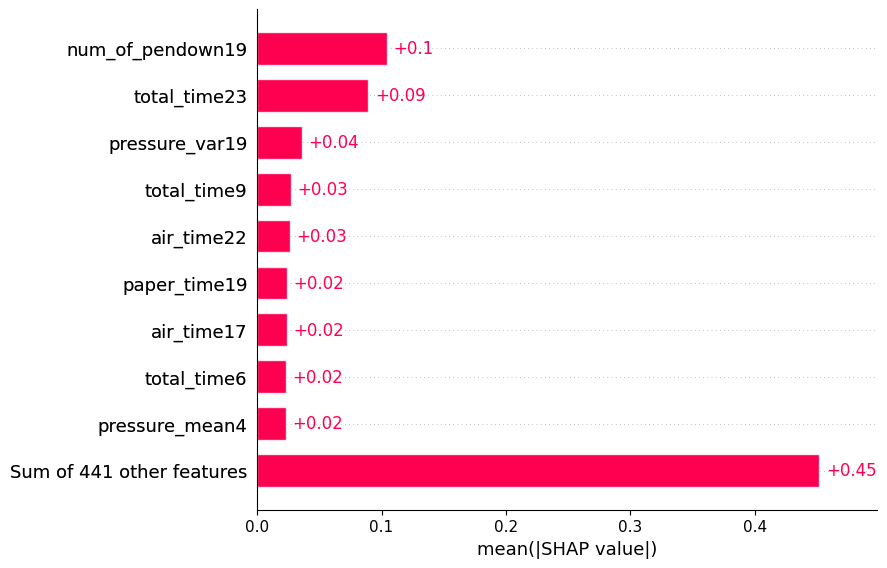

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.initjs()
shap.plots.force(shap_values)

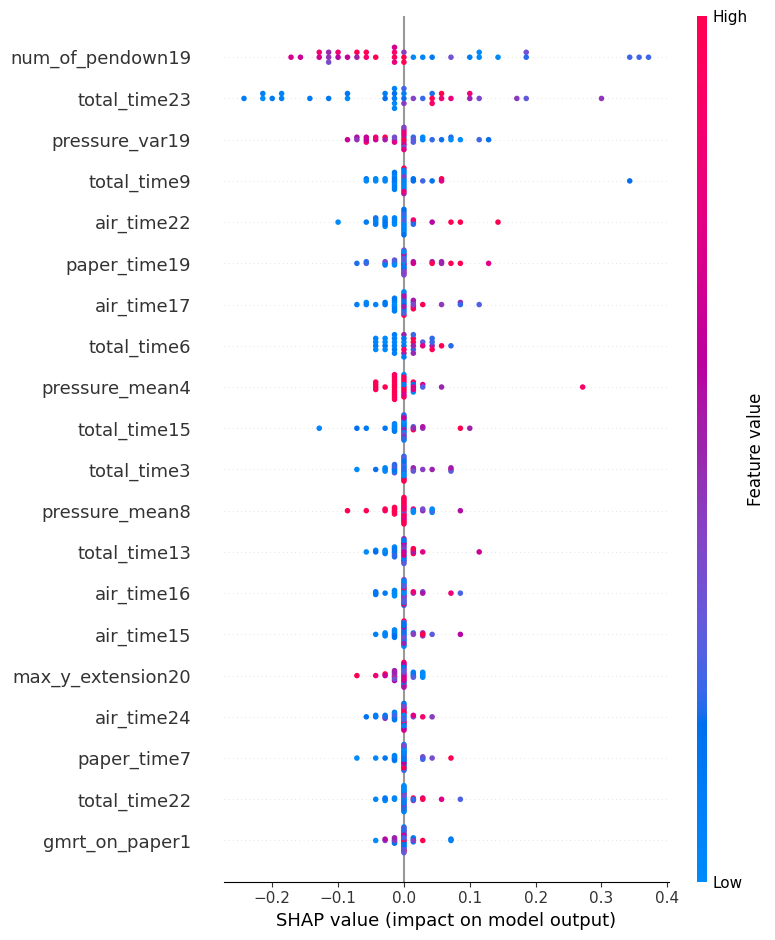

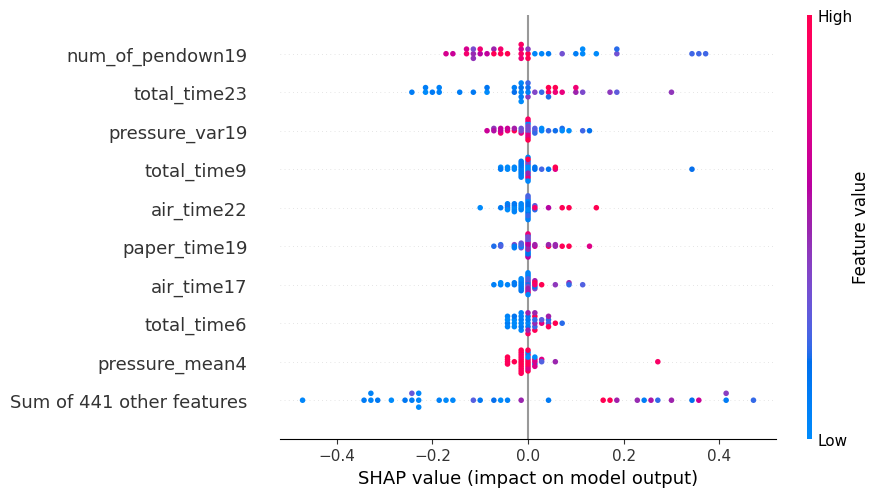

In [ ]:
shap.summary_plot(shap_values)
# or
shap.plots.beeswarm(shap_values)

# Graphs

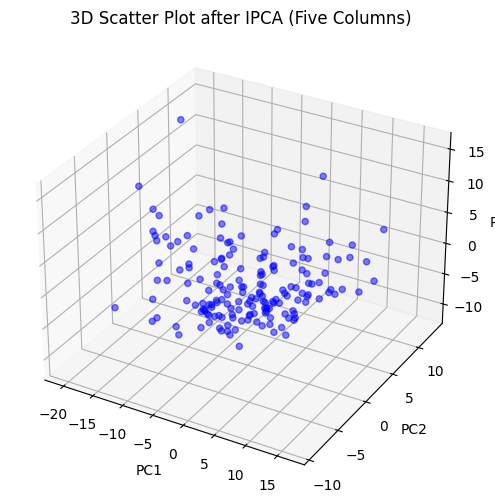

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the transformed data 'df_transformed' with five columns from IPCA
# Replace 'df_transformed' with your actual transformed data

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without labels
ax.scatter(df_transformed[:, 0], df_transformed[:, 1], df_transformed[:, 2], c='b', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('3D Scatter Plot after IPCA (Five Columns)')
plt.show()


In [ ]:
import plotly.express as px

# Assuming you have a DataFrame 'd_df' with your feature values
# Replace 'd_df' with your actual data

fig = px.scatter_3d(d_df, x='air_time1', y='disp_index1', z='gmrt_in_air1', color='class')
fig.update_layout(scene=dict(xaxis_title='Air Time 1', yaxis_title='Disp Index 1', zaxis_title='GMRT in Air 1'))
fig.show()


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Assuming you have the transformed data 'df_transformed' with five columns from IPCA
# Replace 'df_transformed' with your actual transformed data

fig = px.scatter_3d(df_transformed, x=0, y=1, z=2)  # Customize the column indices as needed
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig.show()
